<a href="https://colab.research.google.com/github/MrEgyptian/AI_Penis_Detector/blob/main/Penis_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from tensorflow.keras.optimizers import Adam

# New Section

In [324]:
#data=tf.keras.utils.image_dataset_from_directory(directory="train",
#    labels='inferred',
#    label_mode='int',
#    color_mode='rgb',
#    batch_size=32,
#    image_size=(480, 480),
#    shuffle=True,
#    seed=42,
#    validation_split=0.2,
#    subset='training',
#    interpolation='bilinear')

In [325]:

#valid_data = tf.keras.utils.image_dataset_from_directory(
#    directory='train/',
#    labels='inferred',
#    label_mode='int',
#    color_mode='rgb',
#    batch_size=32,
#    image_size=(480, 480),
#    shuffle=True,
#    seed=42,
#    validation_split=0.2,
#    subset='validation',
#    interpolation='bilinear'
#)




In [326]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [327]:

data = train_datagen.flow_from_directory(
    'train/', target_size=(480, 480), batch_size=32, class_mode='binary'
)

Found 559 images belonging to 2 classes.


In [328]:


valid_data = test_datagen.flow_from_directory(
    'validate/', target_size=(480, 480), batch_size=32, class_mode='binary'
)



Found 120 images belonging to 1 classes.


In [329]:


test_data = test_datagen.flow_from_directory(
    'test/', target_size=(480, 480), batch_size=32, class_mode='binary'
)



Found 77 images belonging to 1 classes.


In [330]:

# CNN model Thingy :)
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(480, 480, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.add(layers.Rescaling(1./255, input_shape=(480, 480, 3)))
#model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(20, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [331]:

# Compiling time yastaaaAAAAAAAAAAAAAA
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [332]:

# Training model time 
epochs=3
acc=model.fit(
                data,
                epochs=epochs,
                steps_per_epoch=data.samples // 32,
                validation_data=valid_data,
                validation_steps=valid_data.samples // 32
             )


Epoch 1/3
17/17 [==============================] - 276s 16s/step - loss: 0.5027 - accuracy: 0.8178 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 2/3
17/17 [==============================] - 234s 14s/step - loss: 0.4420 - accuracy: 0.8444 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 3/3
17/17 [==============================] - 123s 7s/step - loss: 0.4603 - accuracy: 0.8444 - val_loss: 0.1138 - val_accuracy: 1.0000


In [333]:
his=acc.history
his

{'loss': [0.502708375453949, 0.4420272707939148, 0.4603496193885803],
 'accuracy': [0.8178368210792542, 0.8444022536277771, 0.8444022536277771],
 'val_loss': [0.11269894242286682, 0.1278221309185028, 0.11376609653234482],
 'val_accuracy': [1.0, 1.0, 1.0]}

In [334]:
acc = his['accuracy']
val_acc = his['val_accuracy']

loss = his['loss']
val_loss = his['val_loss']
epochs_range = range(epochs)



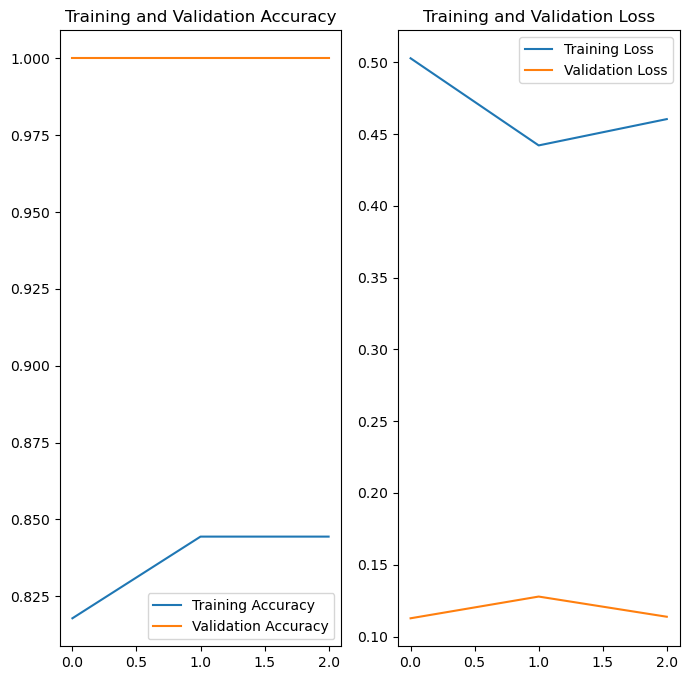

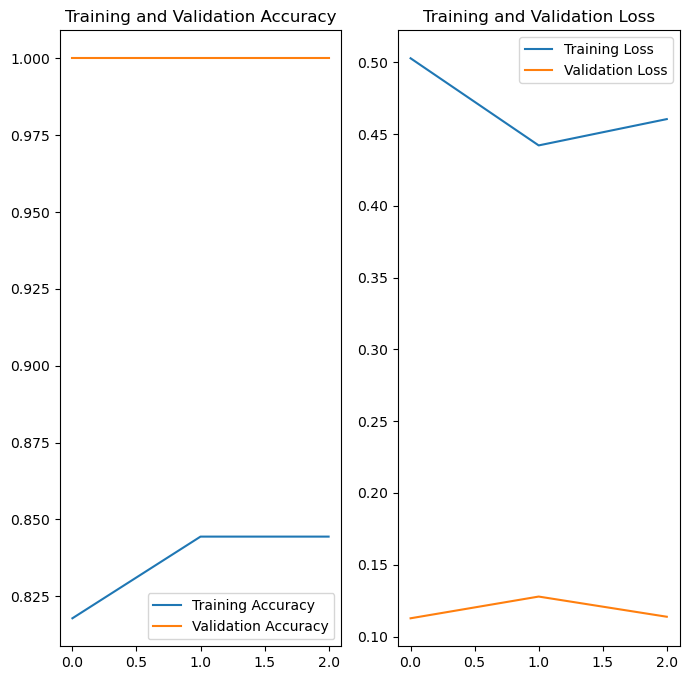

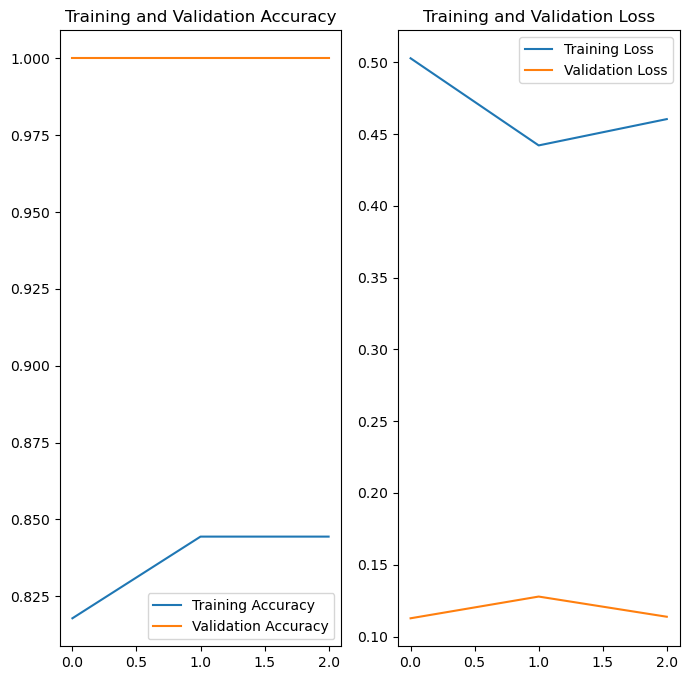

In [335]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [336]:
model.save('dick.keras')

In [337]:
(test_loss, test_acc)=(his['loss'],his['accuracy'])
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data
                                    )
print(f'Test accuracy: {test_acc}')


3/3 [==============================] - 3s 792ms/step - loss: 0.1138 - accuracy: 1.0000
Test accuracy: 1.0


In [287]:

from PIL import Image

In [288]:

def resize_image(input_path, output_path, size=(480, 480), format="JPEG"):
    try:
        # Open the image file
        with Image.open(input_path) as img:
            # Convert image mode to 'RGB' if it has an alpha channel
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            # Resize the image
            resized_img = img.resize(size)
            # Save the resized image
            resized_img.save(output_path, format=format)
            print(f"Image resized and saved to {output_path}")
            return resize_image
    except Exception as e:
        print(f"Error: {e}")

In [289]:
img=resize_image('train/dicks/08z5ycr8ty4c1.jpg.jpg','penis.jpg')

Image resized and saved to penis.jpg


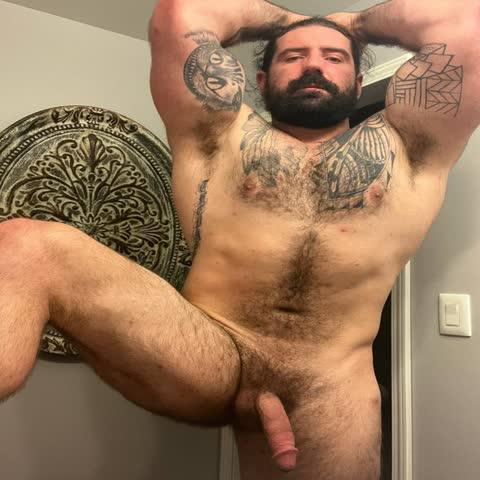

In [290]:
img=tf.keras.utils.load_img('penis.jpg')
img

In [291]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [292]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [309]:
model.predict(img_array)



1/1 [==============================] - 0s 336ms/step


array([[0.15206593]], dtype=float32)

In [294]:

img=resize_image('dick0.png','dick0.jpg')

Image resized and saved to dick0.jpg


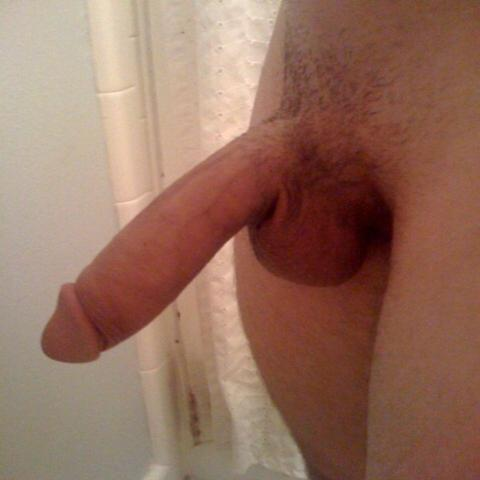

In [310]:


img=tf.keras.utils.load_img('dick0.jpg')
img

In [311]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape


(480, 480, 3)

In [312]:
img=resize_image('dick1.png','dick1.jpg')

Image resized and saved to dick1.jpg


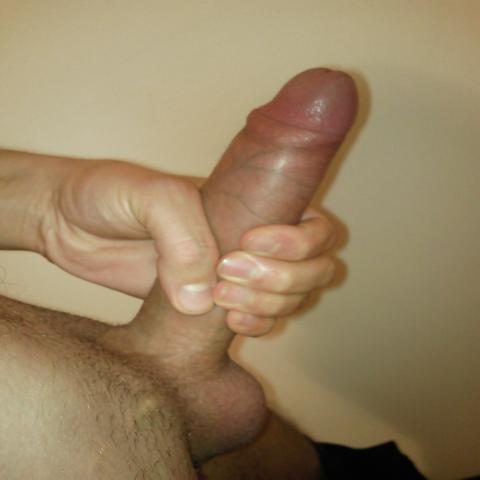

In [313]:


img=tf.keras.utils.load_img('dick1.jpg')
img

In [314]:
arr=tf.keras.preprocessing.image.img_to_array(img)

arr.shape

(480, 480, 3)

In [315]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [316]:
model.predict([img_array]
             
             )

1/1 [==============================] - 0s 162ms/step


array([[0.17188193]], dtype=float32)

In [317]:
img=resize_image('man.png','dick2.jpg')

Image resized and saved to dick2.jpg


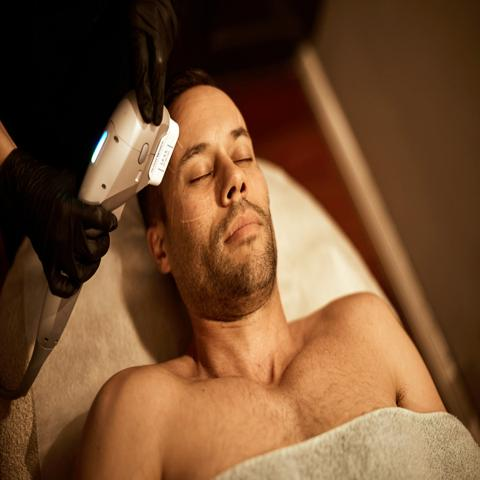

In [318]:

img=tf.keras.utils.load_img('dick2.jpg')
img

In [319]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [320]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)
# Add batch dimension [ - ] [ - ] [ - ] [ - ]
img_array.shape

(1, 480, 480, 3)

In [321]:
while z.history['loss'][0]>0.5:
 z=model.fit(img_array,np.array([0]))


NameError: name 'z' is not defined

In [322]:
model.predict(img_array)[0][0]



1/1 [==============================] - 0s 53ms/step


0.15403143

In [236]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


In [ ]:
img=resize_image('penis.png','penis.jpg')

In [ ]:


img=tf.keras.utils.load_img('penis.jpg')
img


In [ ]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

In [ ]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

In [ ]:
out=model.predict(tf.keras.utils.image_dataset_from_directory('test/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    interpolation='bilinear'))
(out[0]>0.5).astype(int)

In [ ]:
model.fit([img_array],np.array([1]))


In [ ]:
model.predict(img_array)

In [ ]:
out[out.any()>=0.5]